# Importing modules and appending paths

In [1]:
### imports

# external modules
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import os, sys
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../../utils/'))
# add the paths to import local modules



# local modules
import get_oms_data
# importlib.reload(get_oms_data)  # not needed unless making live changes to the modules
from get_oms_data import get_oms_api, get_oms_data, get_oms_response_attribute

import json_utils as jsonu
import plot_utils as pu

In [2]:
import mplhep as hep
# import matplotlib as matplot
# plt.style.use(hep.style.cms)
plt.style.use(hep.style.ROOT)

# Very important to initialize the API


In [3]:
# In case you do not need to use the API you can use the csv files
Df_dict={}
Df_dict['runs']= pd.read_csv("2018AEra_runs.csv")
Df_dict['lumisections']= pd.read_csv("Runs_315190-316766_LS.csv")
#pd.read_csv("Runs_315190-316766_LS.csv")

In [3]:
# get the omsapi instance
omsapi = get_oms_api()

## Getting All runs in different eras 2018

In [4]:
def has_fill(df):
    """
    Input: dataframe
    
    Returns: dataframe 
    
    This function returns a dataframe where only entries that have a non-null "fill_number" attribute are kept.
    """
    dfcopy=df[df.fill_number.isna() == False].copy()
    return dfcopy

def add_loc_wrt_fill(df):
    import numpy as np
    dfcopy= df.copy()
    dfcopy["Fill location"] = np.empty(len(dfcopy))
    temp=dfcopy.groupby("fill_number")["run_number"].transform('count')    
    x=1
    for count,i in enumerate(temp):
        if x==i :
            dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
            x=1
            continue
        dfcopy['Fill location'].iloc[count]="({}/{})".format(x,i)
        x+=1
        
    return dfcopy



def makeDF(json):
    datadict=json['data'][0]['attributes']
    keys=datadict.keys()
    
    datasetlist=[]
    
    for i in range(len(json['data'])):
        values=json['data'][i]['attributes'].values()
        datasetlist.append(values)
    return pd.DataFrame(datasetlist,columns=keys)#\
#     .set_index(['fill_number','run_number'])\
#     .sort_index()

def convert_check_addFillLoc(json):
    """
    Expects a json from the run_number query
    
    """
    df=makeDF(json)
    #now filter out runs that don't  have fill number
    df=has_fill(df)
    #now add run location wrt fill
    DF_withloc=add_loc_wrt_fill(df)
    return DF_withloc

# def get_specific_runs():
    #apply filter for cosmics or collisions


Here are options for the run attributes
```python
['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'b_field','tier0_transfer', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update', 'beamactive_total_deadtime','recorded_lumi', 'delivered_lumi', 'cmssw_version',
'crossing_angle_stop', 'energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'crossing_angle_start', 'fill_type_party2','fill_type_party1', 'beta_star_start', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'clock_type', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam', 'beta_star_stop','hlt_physics_counter']
       
```

In [13]:
# example: get run information for a single run

runnb = (315190,315260) # 2018A
attributes=['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'l1_triggers_counter', 'hlt_physics_throughput','init_lumi',
 'last_update','recorded_lumi', 'delivered_lumi','energy', 'end_lumi', 'hlt_physics_rate','fill_number', 'l1_hlt_mode', 'end_time', 'trigger_mode',
'l1_key_stripped', 'fill_type_party2','fill_type_party1', 'initial_prescale_index',
 'sequence', 'start_time', 'hlt_physics_size', 'fill_type_runtime','hlt_key', 'last_lumisection_number', 'l1_rate','l1_menu',
 'run_number', 'stable_beam','hlt_physics_counter']
run_info = get_oms_data( omsapi, 'runs', runnb ,limit_entries=5_000,attributes=attributes)
# print(run_info)

https://vocms0185.cern.ch/agg/api/v1/runs/?fields=delivered_lumi,hlt_physics_rate,fill_number,fill_type_party1,l1_hlt_mode_stripped,hlt_physics_counter,l1_rate,fill_type_runtime,hlt_physics_throughput,initial_prescale_index,run_number,hlt_key,end_lumi,hlt_physics_size,last_update,sequence,l1_key_stripped,start_time,init_lumi,duration,components,l1_hlt_mode,fill_type_party2,last_lumisection_number,recorded_lumi,l1_menu,trigger_mode,stable_beam,end_time,l1_key,energy,l1_triggers_counter&filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=5000
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=delivered_lumi,hlt_physics_rate,fill_number,fill_type_party1,l1_hlt_mode_stripped,hlt_physics_counter,l1_rate,fill_type_runtime,hlt_physics_throughput,initial_prescale_index,run_number,hlt_key,end_lumi,hlt_physics_size,last_update,sequence,l1_key_stripped,start_time,init_lumi,duration,components,l1_hlt_mode,fill_type_party2,last_lumisection_number,recorded_lumi,l1_m

In [14]:
rundf=makeDF(run_info)
print(rundf.shape)
rundf[["run_number",'fill_number','last_lumisection_number',"l1_key"]]


(54, 32)


,run_number,fill_number,last_lumisection_number,l1_key
0,315190,6614.0,115.0,l1_trg_collisions2018/v9
1,315193,6615.0,27.0,l1_trg_cosmics2018/v62
2,315194,6615.0,149.0,l1_trg_cosmics2018/v62
3,315195,NaN,NaN,None
4,315196,NaN,NaN,None
5,315197,NaN,NaN,None
6,315198,NaN,NaN,None
7,315199,NaN,NaN,None
8,315201,6615.0,7.0,l1_trg_cosmics2018/v62
9,315205,6615.0,6.0,l1_trg_collisions2018/v9


In [15]:
rundf=has_fill(rundf)
rundf.shape

(44, 32)

In [16]:
rundf=convert_check_addFillLoc(run_info)
rundf.shape

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(44, 33)

In [17]:
rundf[["run_number",'fill_number','Fill location','last_lumisection_number',"l1_key"]]

,run_number,fill_number,Fill location,last_lumisection_number,l1_key
0,315190,6614.0,(1/1),115.0,l1_trg_collisions2018/v9
1,315193,6615.0,(1/42),27.0,l1_trg_cosmics2018/v62
2,315194,6615.0,(2/42),149.0,l1_trg_cosmics2018/v62
8,315201,6615.0,(3/42),7.0,l1_trg_cosmics2018/v62
9,315205,6615.0,(4/42),6.0,l1_trg_collisions2018/v9
10,315206,6615.0,(5/42),79.0,l1_trg_cosmics2018/v62
12,315210,6615.0,(6/42),106.0,l1_trg_cosmics2018/v62
13,315214,6615.0,(7/42),2.0,l1_trg_cosmics2018/v63
14,315215,6615.0,(8/42),9.0,l1_trg_circulating2018/v18
15,315216,6615.0,(9/42),67.0,l1_trg_circulating2018/v18


In [18]:
rundf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 53
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   components               44 non-null     object 
 1   l1_hlt_mode_stripped     44 non-null     object 
 2   l1_key                   44 non-null     object 
 3   duration                 44 non-null     int64  
 4   l1_triggers_counter      41 non-null     float64
 5   hlt_physics_throughput   36 non-null     float64
 6   init_lumi                44 non-null     float64
 7   last_update              44 non-null     object 
 8   recorded_lumi            44 non-null     float64
 9   delivered_lumi           44 non-null     float64
 10  energy                   44 non-null     float64
 11  end_lumi                 44 non-null     float64
 12  hlt_physics_rate         36 non-null     float64
 13  fill_number              44 non-null     float64
 14  l1_hlt_mode              44 

Letting Pandas automatically convert the dtypes is optional

## Getting only collision runs

In [19]:
rundf_coll=rundf[rundf['l1_key'].str.contains("collisions")]

In [20]:
rundf_coll[["run_number",'fill_number','Fill location','last_lumisection_number',"l1_key"]]
# to save this dataframe in a csv uncomment below:
# rundf_coll.to_csv("CollisionRuns.csv",index=False)

,run_number,fill_number,Fill location,last_lumisection_number,l1_key
0,315190,6614.0,(1/1),115.0,l1_trg_collisions2018/v9
9,315205,6615.0,(4/42),6.0,l1_trg_collisions2018/v9
19,315225,6615.0,(13/42),29.0,l1_trg_collisions2018/v11
23,315229,6615.0,(17/42),24.0,l1_trg_collisions2018/v10
34,315240,6615.0,(28/42),6.0,l1_trg_collisions2018/v10
35,315241,6615.0,(29/42),NaN,l1_trg_collisions2018/v11
36,315242,6615.0,(30/42),60.0,l1_trg_collisions2018/v11
37,315243,6615.0,(31/42),48.0,l1_trg_collisions2018/v11
38,315244,6615.0,(32/42),42.0,l1_trg_collisions2018/v11
40,315246,6615.0,(33/42),25.0,l1_trg_collisions2018/v11


Saving the Run queries to a csv **(this is mostly to not oversaturate the API)**

## Lumisections Queries 

Here is the list of attributes available for Lumi queries
```python
['rp_time_ready', 'cscp_ready', 'beam1_present', 'physics_flag',
       'dt0_ready', 'bpix_ready', 'ho_ready', 'dtp_ready', 'tecm_ready',
       'gem_ready', 'lumisection_number', 'tibtid_ready', 'fpix_ready',
       'rpc_ready', 'rp_sect_56_ready', 'castor_ready', 'init_lumi', 'pileup',
       'esp_ready', 'hbhea_ready', 'eep_ready', 'ebm_ready', 'recorded_lumi',
       'delivered_lumi', 'dtm_ready', 'gemp_ready', 'eem_ready', 'end_lumi',
       'fill_number', 'esm_ready', 'tecp_ready', 'gemm_ready', 'ebp_ready',
       'end_time', 'hf_ready', 'rp_sect_45_ready', 'cscm_ready', 'cms_active',
       'zdc_ready', 'start_time', 'hbheb_ready', 'beam1_stable', 'tob_ready',
       'hbhec_ready', 'run_number', 'beam2_stable', 'beam2_present',
 ```

In [21]:
# # get the omsapi instance

# omsapi = get_oms_api()

# example: get run information for a single run

runnb = (315190,315260) # 2018A
attributes = ['fill_number',"run_number",'lumisection_number',"physics_flag","cms_active",
              'pileup','delivered_lumi','recorded_lumi',"init_lumi",'end_lumi',
              'beam1_stable','beam2_stable','beam2_present','beam1_present']
ls_info = get_oms_data( omsapi, 'lumisections', runnb ,limit_entries=100_000)


https://vocms0185.cern.ch/agg/api/v1/lumisections/?filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=100000
https://vocms0185.cern.ch/agg/api/v1/lumisections/?filter[run_number][GE]=315190&filter[run_number][LE]=315260&page[offset]=0&page[limit]=100000


In [22]:
ls_df=convert_check_addFillLoc(ls_info)
ls_df.shape

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(2718, 48)

### You could also use the CSV files available in my local project.
`Runs_315190-316766_LS.csv` has the majority of Era 2018A


In [24]:
# ls_df=pd.read_csv("Runs_315190-316766_LS.csv")

In [27]:
rundf[rundf.columns.tolist()[1:]][["last_lumisection_number","run_number","fill_number","Fill location"]]

,last_lumisection_number,run_number,fill_number,Fill location
0,115.0,315190,6614.0,(1/1)
1,27.0,315193,6615.0,(1/42)
2,149.0,315194,6615.0,(2/42)
8,7.0,315201,6615.0,(3/42)
9,6.0,315205,6615.0,(4/42)
10,79.0,315206,6615.0,(5/42)
12,106.0,315210,6615.0,(6/42)
13,2.0,315214,6615.0,(7/42)
14,9.0,315215,6615.0,(8/42)
15,67.0,315216,6615.0,(9/42)


In [28]:
ls_df.tail(10)

,rp_time_ready,cscp_ready,beam1_present,physics_flag,dt0_ready,bpix_ready,ho_ready,dtp_ready,tecm_ready,gem_ready,...,zdc_ready,start_time,hbheb_ready,beam1_stable,tob_ready,hbhec_ready,run_number,beam2_stable,beam2_present,Fill location
2708,None,False,False,False,False,False,False,False,False,None,...,False,2018-04-26T23:57:24Z,True,False,False,True,315260,False,False,(124/133)
2709,None,False,False,False,False,False,False,False,False,None,...,False,2018-04-26T23:57:48Z,True,False,False,True,315260,False,False,(125/133)
2710,None,False,False,False,False,False,False,False,False,None,...,False,2018-04-26T23:58:11Z,True,False,False,True,315260,False,False,(126/133)
2711,None,False,False,False,False,False,True,False,False,None,...,False,2018-04-26T23:58:34Z,True,False,False,True,315260,False,False,(127/133)
2712,None,False,False,False,False,False,True,False,False,None,...,False,2018-04-26T23:58:57Z,True,False,False,True,315260,False,False,(128/133)
2713,None,False,False,False,False,False,True,False,False,None,...,False,2018-04-26T23:59:21Z,True,False,False,True,315260,False,False,(129/133)
2714,None,False,False,False,False,False,True,False,False,None,...,False,2018-04-26T23:59:44Z,True,False,False,True,315260,False,False,(130/133)
2715,None,False,False,False,False,False,True,False,False,None,...,False,2018-04-27T00:00:07Z,True,False,False,True,315260,False,False,(131/133)
2716,None,False,False,False,False,False,True,False,False,None,...,False,2018-04-27T00:00:31Z,True,False,False,True,315260,False,False,(132/133)
2717,None,False,False,False,False,False,True,False,False,None,...,False,2018-04-27T00:00:54Z,True,False,False,True,315260,False,False,(133/133)


Last lumisection number for run 315190 was 115.0 on the Run dataframe.
Here we find out that it's due to CMS not being active after that LS

In [29]:
ls_df.loc[110:120]#[['lumisection_number',"physics_flag","cms_active",'pileup','delivered_lumi','recorded_lumi']]

,rp_time_ready,cscp_ready,beam1_present,physics_flag,dt0_ready,bpix_ready,ho_ready,dtp_ready,tecm_ready,gem_ready,...,zdc_ready,start_time,hbheb_ready,beam1_stable,tob_ready,hbhec_ready,run_number,beam2_stable,beam2_present,Fill location
110,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:11:53Z,True,False,True,True,315190,False,False,(111/121)
111,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:12:16Z,True,False,True,True,315190,False,False,(112/121)
112,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:12:39Z,True,False,True,True,315190,False,False,(113/121)
113,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:13:03Z,True,False,True,True,315190,False,False,(114/121)
114,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:13:26Z,True,False,True,True,315190,False,False,(115/121)
115,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:13:49Z,True,False,True,True,315190,False,False,(116/121)
116,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:14:13Z,True,False,True,True,315190,False,False,(117/121)
117,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:14:36Z,True,False,True,True,315190,False,False,(118/121)
118,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:14:59Z,True,False,True,True,315190,False,False,(119/121)
119,None,True,False,True,True,True,True,True,True,None,...,False,2018-04-26T07:15:23Z,True,False,True,True,315190,False,False,(120/121)


checking with next run number

In [30]:
ls_df.set_index("run_number").loc[315193]

,rp_time_ready,cscp_ready,beam1_present,physics_flag,dt0_ready,bpix_ready,ho_ready,dtp_ready,tecm_ready,gem_ready,...,cms_active,zdc_ready,start_time,hbheb_ready,beam1_stable,tob_ready,hbhec_ready,beam2_stable,beam2_present,Fill location
run_number,,,,,,,,,,,,,,,,,,,,,
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:24:14Z,True,False,True,True,False,False,(22/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:24:37Z,True,False,True,True,False,False,(23/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:25:00Z,True,False,True,True,False,False,(24/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:25:24Z,True,False,True,True,False,False,(25/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:25:47Z,True,False,True,True,False,False,(26/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:26:10Z,True,False,True,True,False,False,(27/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:26:34Z,True,False,True,True,False,False,(28/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:26:57Z,True,False,True,True,False,False,(29/2464)
315193,None,True,False,True,True,True,True,True,True,None,...,True,False,2018-04-26T07:27:20Z,True,False,True,True,False,False,(30/2464)


### Getting the lumisections of collision runs only

In [31]:
# ls_df.run_number.unique().tolist()
# rundf_coll.run_number.tolist(),len(rundf_coll.run_number.tolist())
for i,run in enumerate(rundf_coll.run_number.tolist()):
    print(i,run)
    

0 315190
1 315205
2 315225
3 315229
4 315240
5 315241
6 315242
7 315243
8 315244
9 315246
10 315247
11 315248
12 315249
13 315250
14 315252
15 315255
16 315257
17 315258
18 315259


In [32]:
 temp=[i for i in rundf_coll.run_number.tolist() if i in ls_df.run_number.unique().tolist()]
print(temp,len(temp))

[315190, 315205, 315225, 315229, 315240, 315242, 315243, 315244, 315246, 315247, 315248, 315249, 315250, 315252, 315255, 315257, 315258, 315259] 18


Is equivalent to 

In [33]:
for i in rundf_coll.run_number.tolist():
    if i in ls_df.run_number.unique().tolist():
        print(i)

315190
315205
315225
315229
315240
315242
315243
315244
315246
315247
315248
315249
315250
315252
315255
315257
315258
315259


In [34]:
lsdf_collisions=ls_df.set_index("run_number").loc[[i for i in rundf_coll.run_number.tolist() if i in ls_df.run_number.unique().tolist()]].reset_index()

## Make function to get collisions from ls and run dataframes

In [5]:
def get_collisions(rundf,lsdf):
    rundf_coll=rundf[rundf['l1_key'].str.contains("collisions")]
    
    lsdf_coll=lsdf.set_index("run_number")\
    .loc[[i for i in rundf_coll.run_number.tolist() if i in lsdf.run_number.unique().tolist()]]\
    .reset_index()
    return rundf_coll,lsdf_coll

In [6]:
rundf_coll,lsdf_collisions=get_collisions(Df_dict['runs'],Df_dict['lumisections'])

In [8]:
rundf_coll[['l1_key','run_number']]

,l1_key,run_number
0,l1_trg_collisions2018/v9,315190
4,l1_trg_collisions2018/v9,315205
13,l1_trg_collisions2018/v11,315225
17,l1_trg_collisions2018/v10,315229
28,l1_trg_collisions2018/v10,315240
...,...,...
801,l1_trg_collisions2018/v24,316984
802,l1_trg_collisions2018/v24,316985
807,l1_trg_collisions2018/v24,316993
808,l1_trg_collisions2018/v24,316994


## Lets plot the lumi level info

In [33]:
lsdf_collisions[["init_lumi","end_lumi"]].loc[1550:1560]

,init_lumi,end_lumi
1550,0.682821,0.681102
1551,0.681102,0.681225
1552,0.681225,0.680837
1553,0.680837,0.680407
1554,0.680407,0.679941
1555,0.679941,0.679596
1556,0.679596,0.679170
1557,0.679170,0.678758
1558,0.678758,0.678579
1559,0.678579,0.678141


Text(0.5, 1.0, 'run 315240')

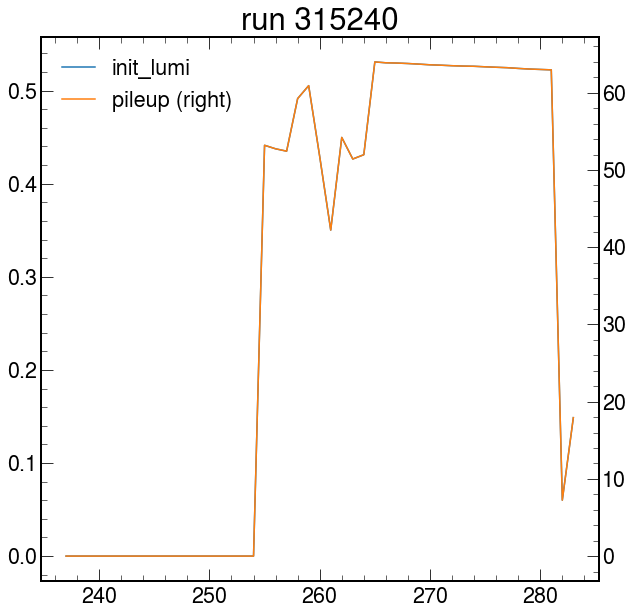

In [9]:
lumi_info=lsdf_collisions[['run_number','init_lumi', 'end_lumi',
                 'pileup',
                 'recorded_lumi', 'delivered_lumi',
                 'lumisection_number',]]
run=315240
lumi_info=lumi_info[lumi_info['run_number']== run]
lumi_info.plot(y=['init_lumi', 'pileup'],secondary_y="pileup")
# plt.yscale("log")
plt.title("run {}".format(run))

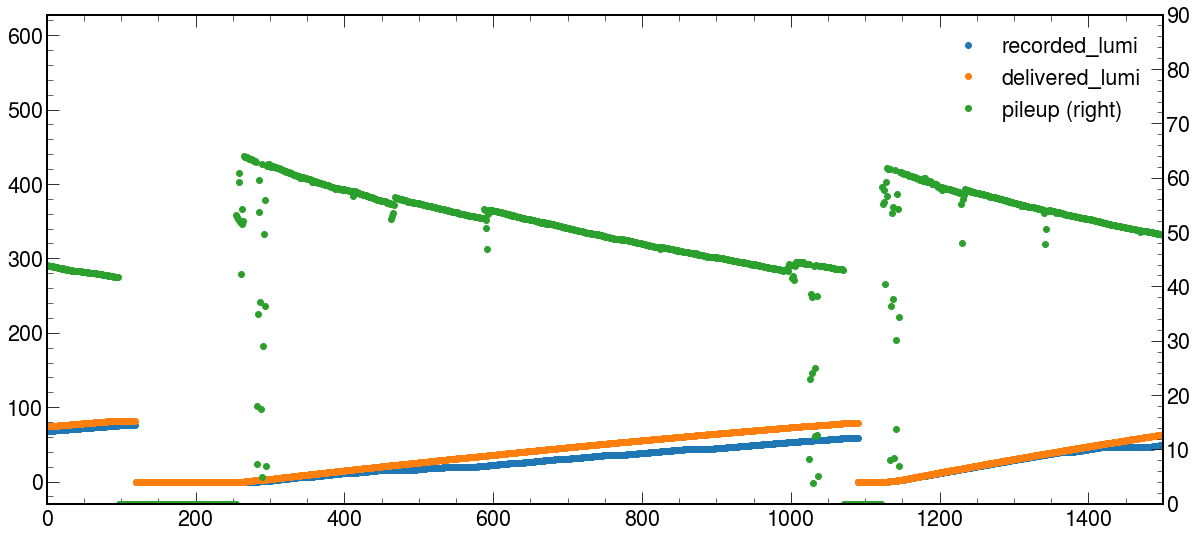

In [42]:
# lsdf_collisions.plot(y=["init_lumi","end_lumi"],figsize=(20,5),logy=False,logx=False,kind='hist',bins=1000,histtype="step")
# lsdf_collisions.plot(y=['pileup'],figsize=(20,5),logy=False,logx=False,kind='hist',bins=1000,histtype="step")
lsdf_collisions.plot(y=['recorded_lumi','delivered_lumi','pileup'],style='o',figsize=(20,9),logy=False,logx=False,secondary_y="pileup")
plt.ylim(0,90)

plt.xlim(0,1500)
plt.show()
# plt.legend(loc=)
# lsdf_collisions.plot(y=['init_lumi','end_lumi'],x='run_number' ,figsize=(19,9),logy=False,logx=False)

In [31]:
lsdf_collisions['end_lumi'] -lsdf_collisions['init_lumi']

0       -0.000365
1       -0.000415
2       -0.000323
3       -0.000240
4        0.000081
           ...   
62131    0.000000
62132    0.000000
62133    0.000000
62134    0.000000
62135    0.000000
Length: 62136, dtype: float64

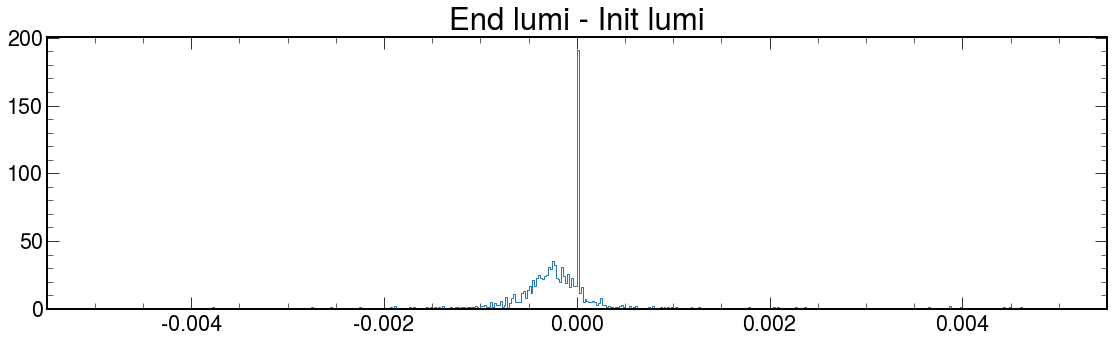

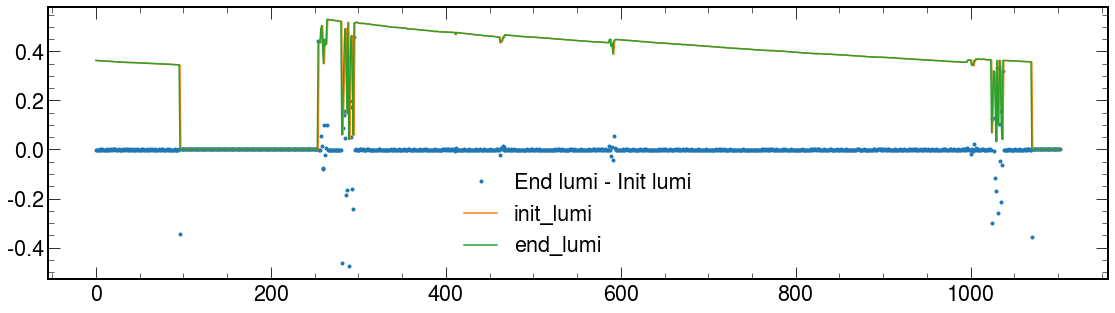

In [78]:
figsize=(19,5)
dpi=None

lumidelta=lsdf_collisions['end_lumi'] -lsdf_collisions['init_lumi']


plt.figure(figsize=figsize,dpi=dpi)
plt.title("End lumi - Init lumi")
plt.hist(lumidelta,bins=500,range=(-.005,.005),histtype="step");
plt.show()


linestyle,marker='','.'

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(lsdf_collisions.index,lumidelta,label="End lumi - Init lumi",linestyle=linestyle,marker=marker,);
# plt.show()

# plt.figure(figsize=figsize,dpi=dpi)
plt.plot(lsdf_collisions.index,lsdf_collisions.init_lumi,label='init_lumi')
plt.plot(lsdf_collisions.index,lsdf_collisions.end_lumi,label='end_lumi')
plt.legend()
plt.show()

# Plot the Run level info

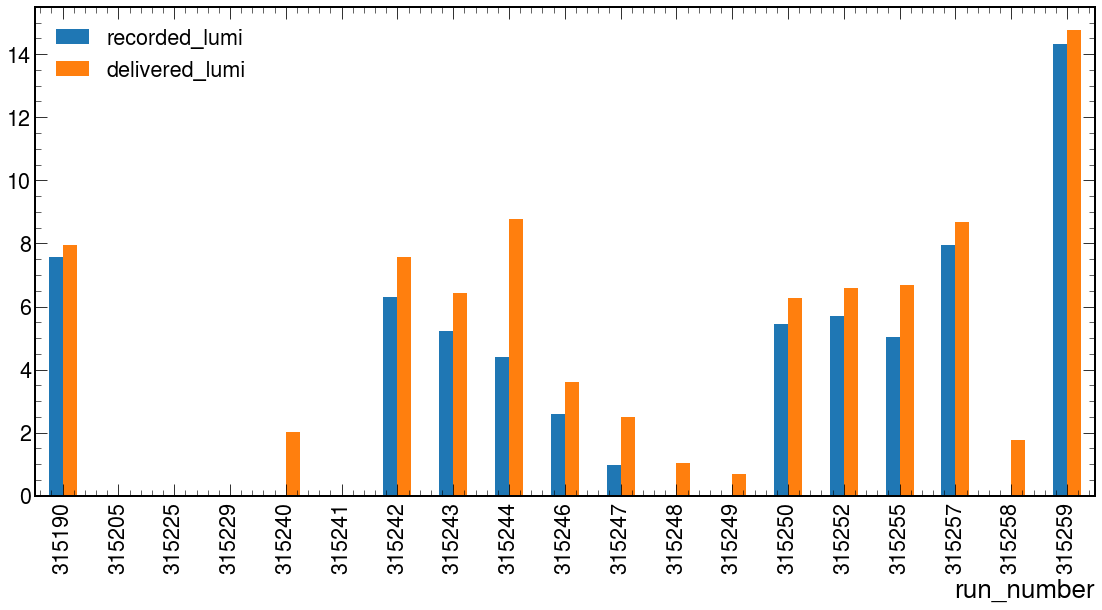

In [141]:
rundf_coll.plot(y=['recorded_lumi',"delivered_lumi"],x="run_number",
                kind="bar",figsize=(19,9),logy=False,logx=False);
# rundf_coll.plot(y='delivered_lumi');

In [138]:
rundf_coll[['run_number','recorded_lumi',"delivered_lumi"]]

,run_number,recorded_lumi,delivered_lumi
0,315190,7.581242,7.945422
9,315205,0.000000,0.000000
19,315225,0.000000,0.000000
23,315229,0.000000,0.000000
34,315240,0.000000,2.014255
35,315241,0.000000,0.000000
36,315242,6.286153,7.556668
37,315243,5.235247,6.433589
38,315244,4.396773,8.766761
40,315246,2.580070,3.605539


# It is useful to join the different dataframes into one dictionary for easier access

In [46]:
Df_dict={}
Df_dict['runs']= pd.read_csv("2018AEra_runs.csv")
Df_dict['lumisections']= pd.read_csv("Runs_315190-316766_LS.csv")
#pd.read_csv("Runs_315190-316766_LS.csv")

In [44]:
Df_dict['runs'].isna().sum()['run_number']

0

In [47]:
Df_dict['lumisections'].isna().sum()['run_number']

0

In [77]:
Df_dict["runs"].columns

Index(['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration',
       'l1_triggers_counter', 'hlt_physics_throughput', 'init_lumi',
       'last_update', 'recorded_lumi', 'delivered_lumi', 'energy', 'end_lumi',
       'hlt_physics_rate', 'fill_number', 'l1_hlt_mode', 'end_time',
       'trigger_mode', 'l1_key_stripped', 'fill_type_party2',
       'fill_type_party1', 'initial_prescale_index', 'sequence', 'start_time',
       'hlt_physics_size', 'fill_type_runtime', 'hlt_key',
       'last_lumisection_number', 'l1_rate', 'l1_menu', 'run_number',
       'stable_beam', 'hlt_physics_counter', 'Fill location'],
      dtype='object')

## Making the ranking system

In [6]:
def ref_rank(DF,runnbs,Experimental = False):
    """
    Takes a run number and looks at all the numbers before it in the given pandas dataframe.
    If run number is the first in the frame retruns Null
    
    Usage:
    ref_rank(dictionary,runnbs,sort=False,**kwargs)
    
    Returns:
    dataframe of runs with ranks per criteria w.r.t given run number
    
    Best rank of the runnb given is 1
    Best rank for the pileup is 0
    Best rank in general is as close to 0 as possible
    """
    if isinstance(DF,(pd.DataFrame,dict)):
        pass
    else:
        raise TypeError("Expecting a pandas dataframe or dictionary but got something else")
        
    if runnbs not in DF['lumisections']['run_number'].values:
        for i in DF['runs']['run_number']:
            if abs(runnbs - i) < 10:
                print("You can try {}".format(i))
        raise KeyError("{} not in the the dataframe".format(runnbs))
        
    ################## Experimental ###################
    if Experimental:
        
        # find missing runs
        list_missingruns=missing_runs(DF['runs'],DF['lumisections'])
        # filter out missing runs
        runs_skim= DF['runs'].set_index("run_number").drop(list_missingruns).reset_index()

        # only work with runs before given run number
        runstocheck=runs_skim[runs_skim['run_number']< runnbs ]
        print("experimental")
    ###################################################
    else: 
        # only work with runs before the given run number
        runstocheck=DF['runs'][DF['runs']['run_number']< runnbs ]

    # get run_number ranks based on distance
    run_place = runnbs-runstocheck['run_number']  
    runstocheck['run_rank']=run_place
    
    # get run_number pileups
    ls_skim=DF['lumisections'][DF['lumisections']["run_number"]< runnbs ]
    ls_pileup= get_pileup(ls_skim)  
    # ls_skim.groupby(['run_number'])['pileup'].mean()
    
    runnbspileup= get_pileup(DF['lumisections']).loc[runnbs]  
    # DF['lumisections'].groupby(['run_number'])['pileup'].mean().loc[runnbs]
    runstocheck['pileup_rank']= abs(runnbspileup -ls_pileup.values)
    
    
    #### Get number of lumisections rank ####
    last_lumi_runnbs = DF["runs"].set_index("run_number").loc[runnbs].last_lumisection_number
    runstocheck["number_of_lumisections_rank"]=abs(last_lumi_runnbs -DF['runs'].last_lumisection_number)
    
    #### Get luminosity rank #### (average of init lumi per lumisection)
    runAvgInstlumi=get_avg_initLumi(DF["lumisections"]).loc[runnbs]
    runstocheck["inst_lumi_rank"]= abs(runAvgInstlumi - get_avg_initLumi(ls_skim) ).tolist()
    
#     print(DF["runs"].set_index('run_number').loc[runnbs])
    print("Target run : {}".format(runnbs))
    print("average pileup : {}".format(runnbspileup))
    print("last lumi : {}".format(last_lumi_runnbs))
    print("avg inst lumi : {}".format(runAvgInstlumi))
    
    return runstocheck

## For some reason the ls df does not have the same runs as the run df

The quick fix for now (implemented in `ref_rank()` if `Experimental=True`  is given) is to filter out the missing runs from the rundf.
The functions below have been created to help with this

In [7]:
def get_runs_in_ls_df(lsdf):
    """
    Gets the list of run numbers in the lumi df
    """
    return lsdf['run_number'].unique()
def missing_runs(runsdf,lsdf):
    '''
    Function takes both run and lumi df and find missing runs in the lumi df.
    Returns:  list of missing runs
    '''
    miss_runs=[]
    runsINls=get_runs_in_ls_df(lsdf)
    for i in runsdf['run_number'].values:
        if i not in runsINls:
            miss_runs.append(i)
    return miss_runs
def get_pileup(lsdf):
    """
    Gets the pileup from the lumi df and returns a Pandas Series with mean PU per run.
    """
    return lsdf.groupby(['run_number'])['pileup'].mean()

def get_avg_initLumi(lsdf):
    """
    Gets average init luminosity for each lumisection from the LS dataframe
    """
    
    
    return lsdf.groupby(["run_number"])["init_lumi"].mean()

# Testing the ranking system

In [8]:
target=316201

In [9]:
ref_rank(Df_dict,
         target,
         Experimental=True) \
[['run_number','run_rank','pileup_rank',"number_of_lumisections_rank","inst_lumi_rank", 'Fill location',"fill_number","last_lumisection_number","l1_key"]] \
.set_index('run_number') \
.sort_values("run_rank")


experimental
Target run : 316201
average pileup : 26.85062001015781
last lumi : 498.0
avg inst lumi : 0.9598289318145956


<ipython-input-6-ec826c279aff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['run_rank']=run_place
<ipython-input-6-ec826c279aff>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['pileup_rank']= abs(runnbspileup -ls_pileup.values)
<ipython-input-6-ec826c279aff>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,run_rank,pileup_rank,number_of_lumisections_rank,inst_lumi_rank,Fill location,fill_number,last_lumisection_number,l1_key
run_number,,,,,,,,
316200,1,3.474994,1579.0,0.124221,(4/6),6675.0,10.0,l1_trg_collisions2018/v20
316199,2,13.788476,417.0,0.492897,(3/6),6675.0,1197.0,l1_trg_collisions2018/v20
316198,3,26.850577,467.0,0.959827,(2/6),6675.0,44.0,l1_trg_circulating2018/v27
316196,5,26.850476,431.0,0.959825,(1/6),6675.0,1.0,l1_trg_circulating2018/v27
316187,14,1.173742,492.0,0.041958,(5/5),6674.0,2077.0,l1_trg_collisions2018/v20
...,...,...,...,...,...,...,...,...
315205,996,26.850620,492.0,0.959829,(4/42),6615.0,6.0,l1_trg_collisions2018/v9
315201,1000,26.850620,491.0,0.959829,(3/42),6615.0,7.0,l1_trg_cosmics2018/v62
315194,1007,26.850620,349.0,0.959829,(2/42),6615.0,149.0,l1_trg_cosmics2018/v62


In [10]:
ref_rank(Df_dict,
         target,
         Experimental=True) \
[['run_number','run_rank','pileup_rank',"number_of_lumisections_rank","inst_lumi_rank", 'Fill location',"fill_number","last_lumisection_number","l1_key"]] \
.set_index('run_number') \
.sort_values("run_rank").loc[315713]


experimental
Target run : 316201
average pileup : 26.85062001015781
last lumi : 498.0
avg inst lumi : 0.9598289318145956


<ipython-input-6-ec826c279aff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['run_rank']=run_place
<ipython-input-6-ec826c279aff>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['pileup_rank']= abs(runnbspileup -ls_pileup.values)
<ipython-input-6-ec826c279aff>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

run_rank                                             488
pileup_rank                                    13.170078
number_of_lumisections_rank                        494.0
inst_lumi_rank                                  0.416784
Fill location                                      (7/7)
fill_number                                       6641.0
last_lumisection_number                           1132.0
l1_key                         l1_trg_collisions2018/v16
Name: 315713, dtype: object

In [11]:
ref_rank(Df_dict,
         target,
         Experimental=True) \
[['run_number','run_rank','pileup_rank',"number_of_lumisections_rank","inst_lumi_rank", 'Fill location',"fill_number","last_lumisection_number","l1_key"]] \
.set_index('run_number') \
.sort_values("run_rank").loc[315705]


experimental
Target run : 316201
average pileup : 26.85062001015781
last lumi : 498.0
avg inst lumi : 0.9598289318145956


<ipython-input-6-ec826c279aff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['run_rank']=run_place
<ipython-input-6-ec826c279aff>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runstocheck['pileup_rank']= abs(runnbspileup -ls_pileup.values)
<ipython-input-6-ec826c279aff>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

run_rank                                             496
pileup_rank                                     4.652014
number_of_lumisections_rank                        385.0
inst_lumi_rank                                  0.196252
Fill location                                    (10/10)
fill_number                                       6640.0
last_lumisection_number                            710.0
l1_key                         l1_trg_collisions2018/v16
Name: 315705, dtype: object

##  Let's see the Json used in the Cert. Helper

In [12]:
RefRunDf=pd.read_json("allRunsRefRuns.json")

In [13]:
RefRunDf.set_index("run_number").loc[316201]

,run_reconstruction_type,reference_run_number,reference_run_reconstruction_type,dataset
run_number,,,,
316201,express,315713,express,/StreamExpress/Run2018A-Express-v1/DQMIO
316201,prompt,315705,prompt,/ZeroBias/Run2018A-PromptReco-v1/DQMIO


### To do

- Add a delta relative (signed) Percentage of difference

- Add filter for collisions only
- Add filter if run has 0 Rec Lumi
- Add Zerobias rate to DF
    - Add delta relative rate (signed) 
- Add flags from RunReg
- Give Anushree all 2018 inst. luminosity and zerobias rate per lumisection


delta relative is 

$$\frac{ target_{qty} -run_{qty} }{target_{qty}}\times 100$$

`'last_lumisection_number'` refers to the last lumisections where `cms_active` is True

# Exploration and developing area

### Get only collisions by query

# Get ZeroBias rates and plot with pileup

In [54]:
# # get the omsapi instance

omsapi = get_oms_api()

# example: get run information for a single run

runnb = (315190,315260) # 2018A
# runnb= 302328
extrafilter={"attribute_name":"dataset_name",'value':'ZeroBias','operator':'EQ'}

attributes =['start_time', 'last_lumisection_number', 'rate', 'run_number',
       'last_lumisection_in_run', 'first_lumisection_number', 'dataset_name',
       'cms_active', 'events']

Datasets_info = get_oms_data( omsapi, 'datasetrates', runnb ,limit_entries=100_000,
                             extrafilters=[extrafilter])


https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][GE]=315190&filter[run_number][LE]=315260&filter[dataset_name][EQ]=ZeroBias&page[offset]=0&page[limit]=100000
https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][GE]=315190&filter[run_number][LE]=315260&filter[dataset_name][EQ]=ZeroBias&page[offset]=0&page[limit]=100000


In [124]:
dataset_ratesDF=makeDF(Datasets_info)
Df_dict["dataset_rates"]=dataset_ratesDF

In [126]:
dataset_ratesDF.columns

Index(['start_time', 'last_lumisection_number', 'rate', 'run_number',
       'last_lumisection_in_run', 'first_lumisection_number', 'dataset_name',
       'cms_active', 'events'],
      dtype='object')

Store it in a csv

### Get HLT Rate per Lumisection (luka has it)

In [138]:
Df_dict["dataset_rates"].run_number.unique()

array([315190, 315193, 315194, 315206, 315210, 315216, 315218, 315220,
       315224, 315225, 315226, 315227, 315231, 315234, 315237, 315238,
       315239, 315242, 315243, 315244, 315246, 315247, 315250, 315252,
       315255, 315257, 315259, 315260])

In [136]:
Df_dict["runs"].set_index('run_number').loc[315240]

components                 ['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'D...
l1_hlt_mode_stripped                                      collisions2018/v72
l1_key                                             l1_trg_collisions2018/v10
duration                                                                 176
l1_triggers_counter                                                 440063.0
hlt_physics_throughput                                                   NaN
init_lumi                                                           0.529791
last_update                                             2018-04-26T19:01:55Z
recorded_lumi                                                            0.0
delivered_lumi                                                      2.014255
energy                                                                6499.0
end_lumi                                                            0.148706
hlt_physics_rate                                                         NaN

In [135]:
Df_dict["dataset_rates"].set_index('run_number').loc[315240]

KeyError: 315240

<AxesSubplot:title={'center':'315242'}>

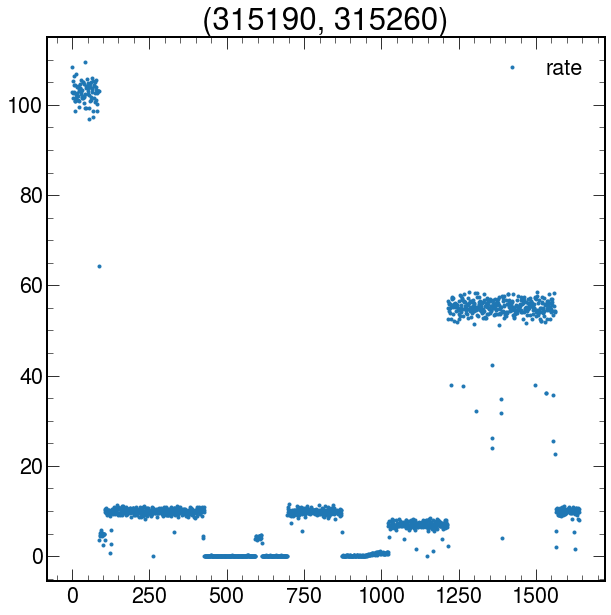

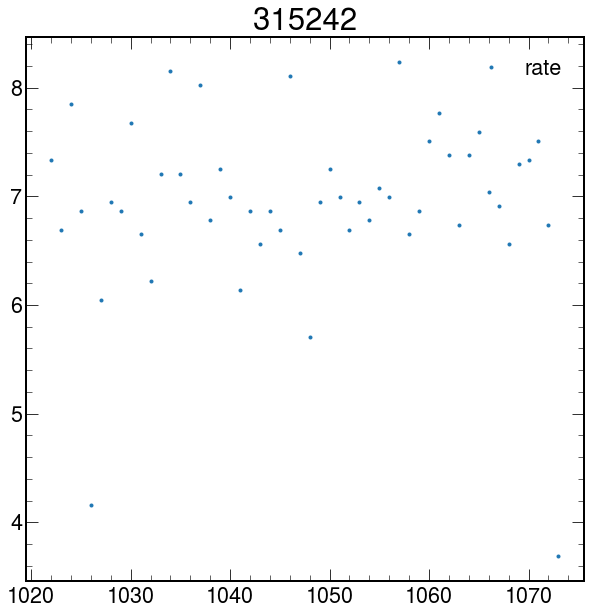

In [42]:
if isinstance(runnb,tuple):
    dataset_ratesDF.plot(y='rate',style='.',title="{}".format(runnb))
run=315242
dataset_ratesDF[dataset_ratesDF["run_number"]==run].plot(y='rate',style='.',title="{}".format(run))
    

Text(0.5, 1.0, '315190')

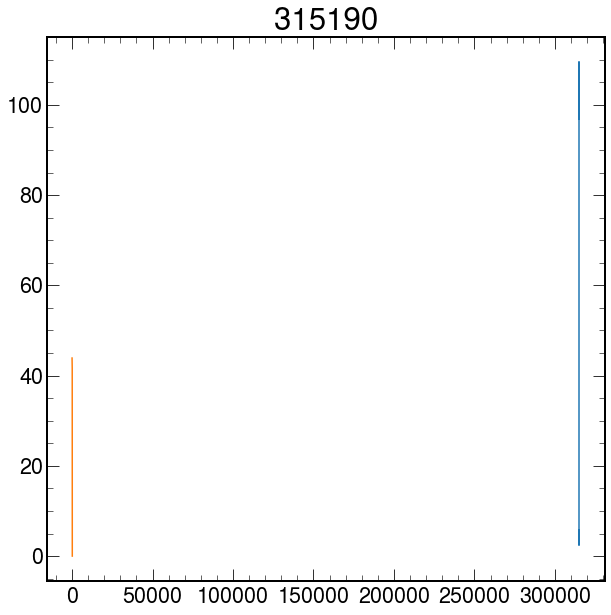

In [292]:
plt.plot(
         Df_dict["dataset_rates"].set_index('run_number').loc[run].rate,label='ZeroBias Rate')
plt.plot(lsdf_collisions.set_index(['run_number']).loc[run].lumisection_number,
         lsdf_collisions.set_index(['run_number']).loc[315190].pileup,label='Pileup')
plt.title("{}".format(run))

# Df_dict['dataset_rates']